In [58]:
# Connect to google drive (since this was done on Google Colab)
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [59]:
# change working directory to where I want to save the output .bmp
%cd "/content/drive/My Drive/Colab Notebooks"

/content/drive/My Drive/Colab Notebooks


In [ ]:
# Useful source of information: 
# 3blue1brown: https://www.youtube.com/watch?v=3s7h2MHQtxc 

In [2]:
# imports
from matplotlib import pyplot as plt # show the arrays made
import numpy as np # array processing
from imageio import imwrite # write the final output image

In [7]:
# The building block of the Hilbert curve
order1 = np.ones((3,3))
order1[1:3, 1] = 0

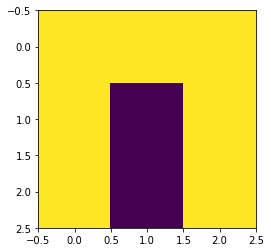

In [18]:
# This is our building block
plt.imshow(order1 > 0) # yellow is the line drawn

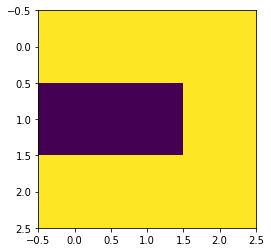

In [41]:
# This is the rotated building block that goes on the lower left
plt.imshow(np.rot90(order1,3) > 0)

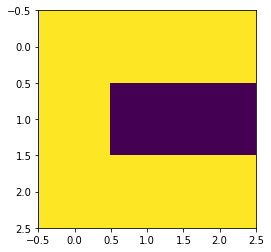

In [39]:
# This is the rotated building block that goes on the lower right
plt.imshow(np.rot90(order1,1) > 0)

In [54]:
n = 8 # n is the amount of times we duplicate the Hilbert curve
prev_order = order1.copy()
for i in range(n):
  side_len = (prev_order.shape[0]*2)+1
  curr_order = np.zeros((side_len, side_len))
  
  # top left
  curr_order[0:prev_order.shape[0], 0:prev_order.shape[0]] = prev_order.copy()
  
  # top right
  curr_order[0:prev_order.shape[0], -prev_order.shape[0]:] = prev_order.copy()

  # bottom left
  curr_order[-prev_order.shape[0]:, 0:prev_order.shape[0]] = np.rot90(prev_order,3)

  # bottom right
  curr_order[-prev_order.shape[0]:, -prev_order.shape[0]:] = np.rot90(prev_order,1)

  

  # middle connections
  curr_order[prev_order.shape[0]-1, prev_order.shape[0]] = 1.0
  curr_order[prev_order.shape[0],0] = 1.0
  curr_order[prev_order.shape[0],-1] = 1.0


  prev_order = curr_order.copy()

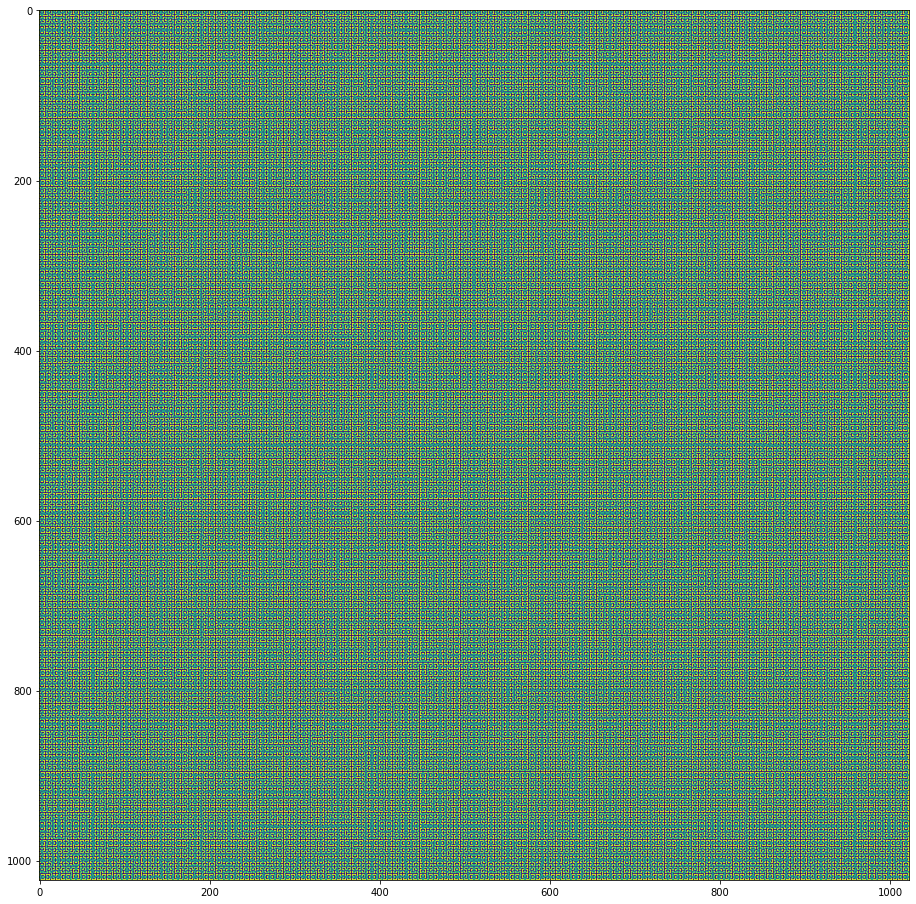

In [56]:
plt.figure(figsize=(16,16))
plt.imshow(curr_order>0)

In [60]:
curr_order.shape

(1023, 1023)

In [71]:
curr_order[curr_order > 0] = 255 # rgb tends to be from 0 to 255

In [73]:
# save as bitmap to prevent aliasing
imwrite(uri="output.bmp", im=np.array(curr_order, dtype=np.uint8))